In [183]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [184]:
import warnings
warnings.filterwarnings('ignore')

In [237]:
# Read the given CSV file, and view some sample records
df_carDetails = pd.read_csv("CarPrice_Assignment.csv")
df_carDetails.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [238]:
df_carDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [239]:
df_carDetails.rename(columns={'curbweight': 'carweight'}, inplace=True)

In [240]:
df_carDetails.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,carweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [241]:
#check for null values
df_carDetails.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
carweight           0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

From the above it is clear that there are no null values in the data. So we are good with data.

Data Visualization

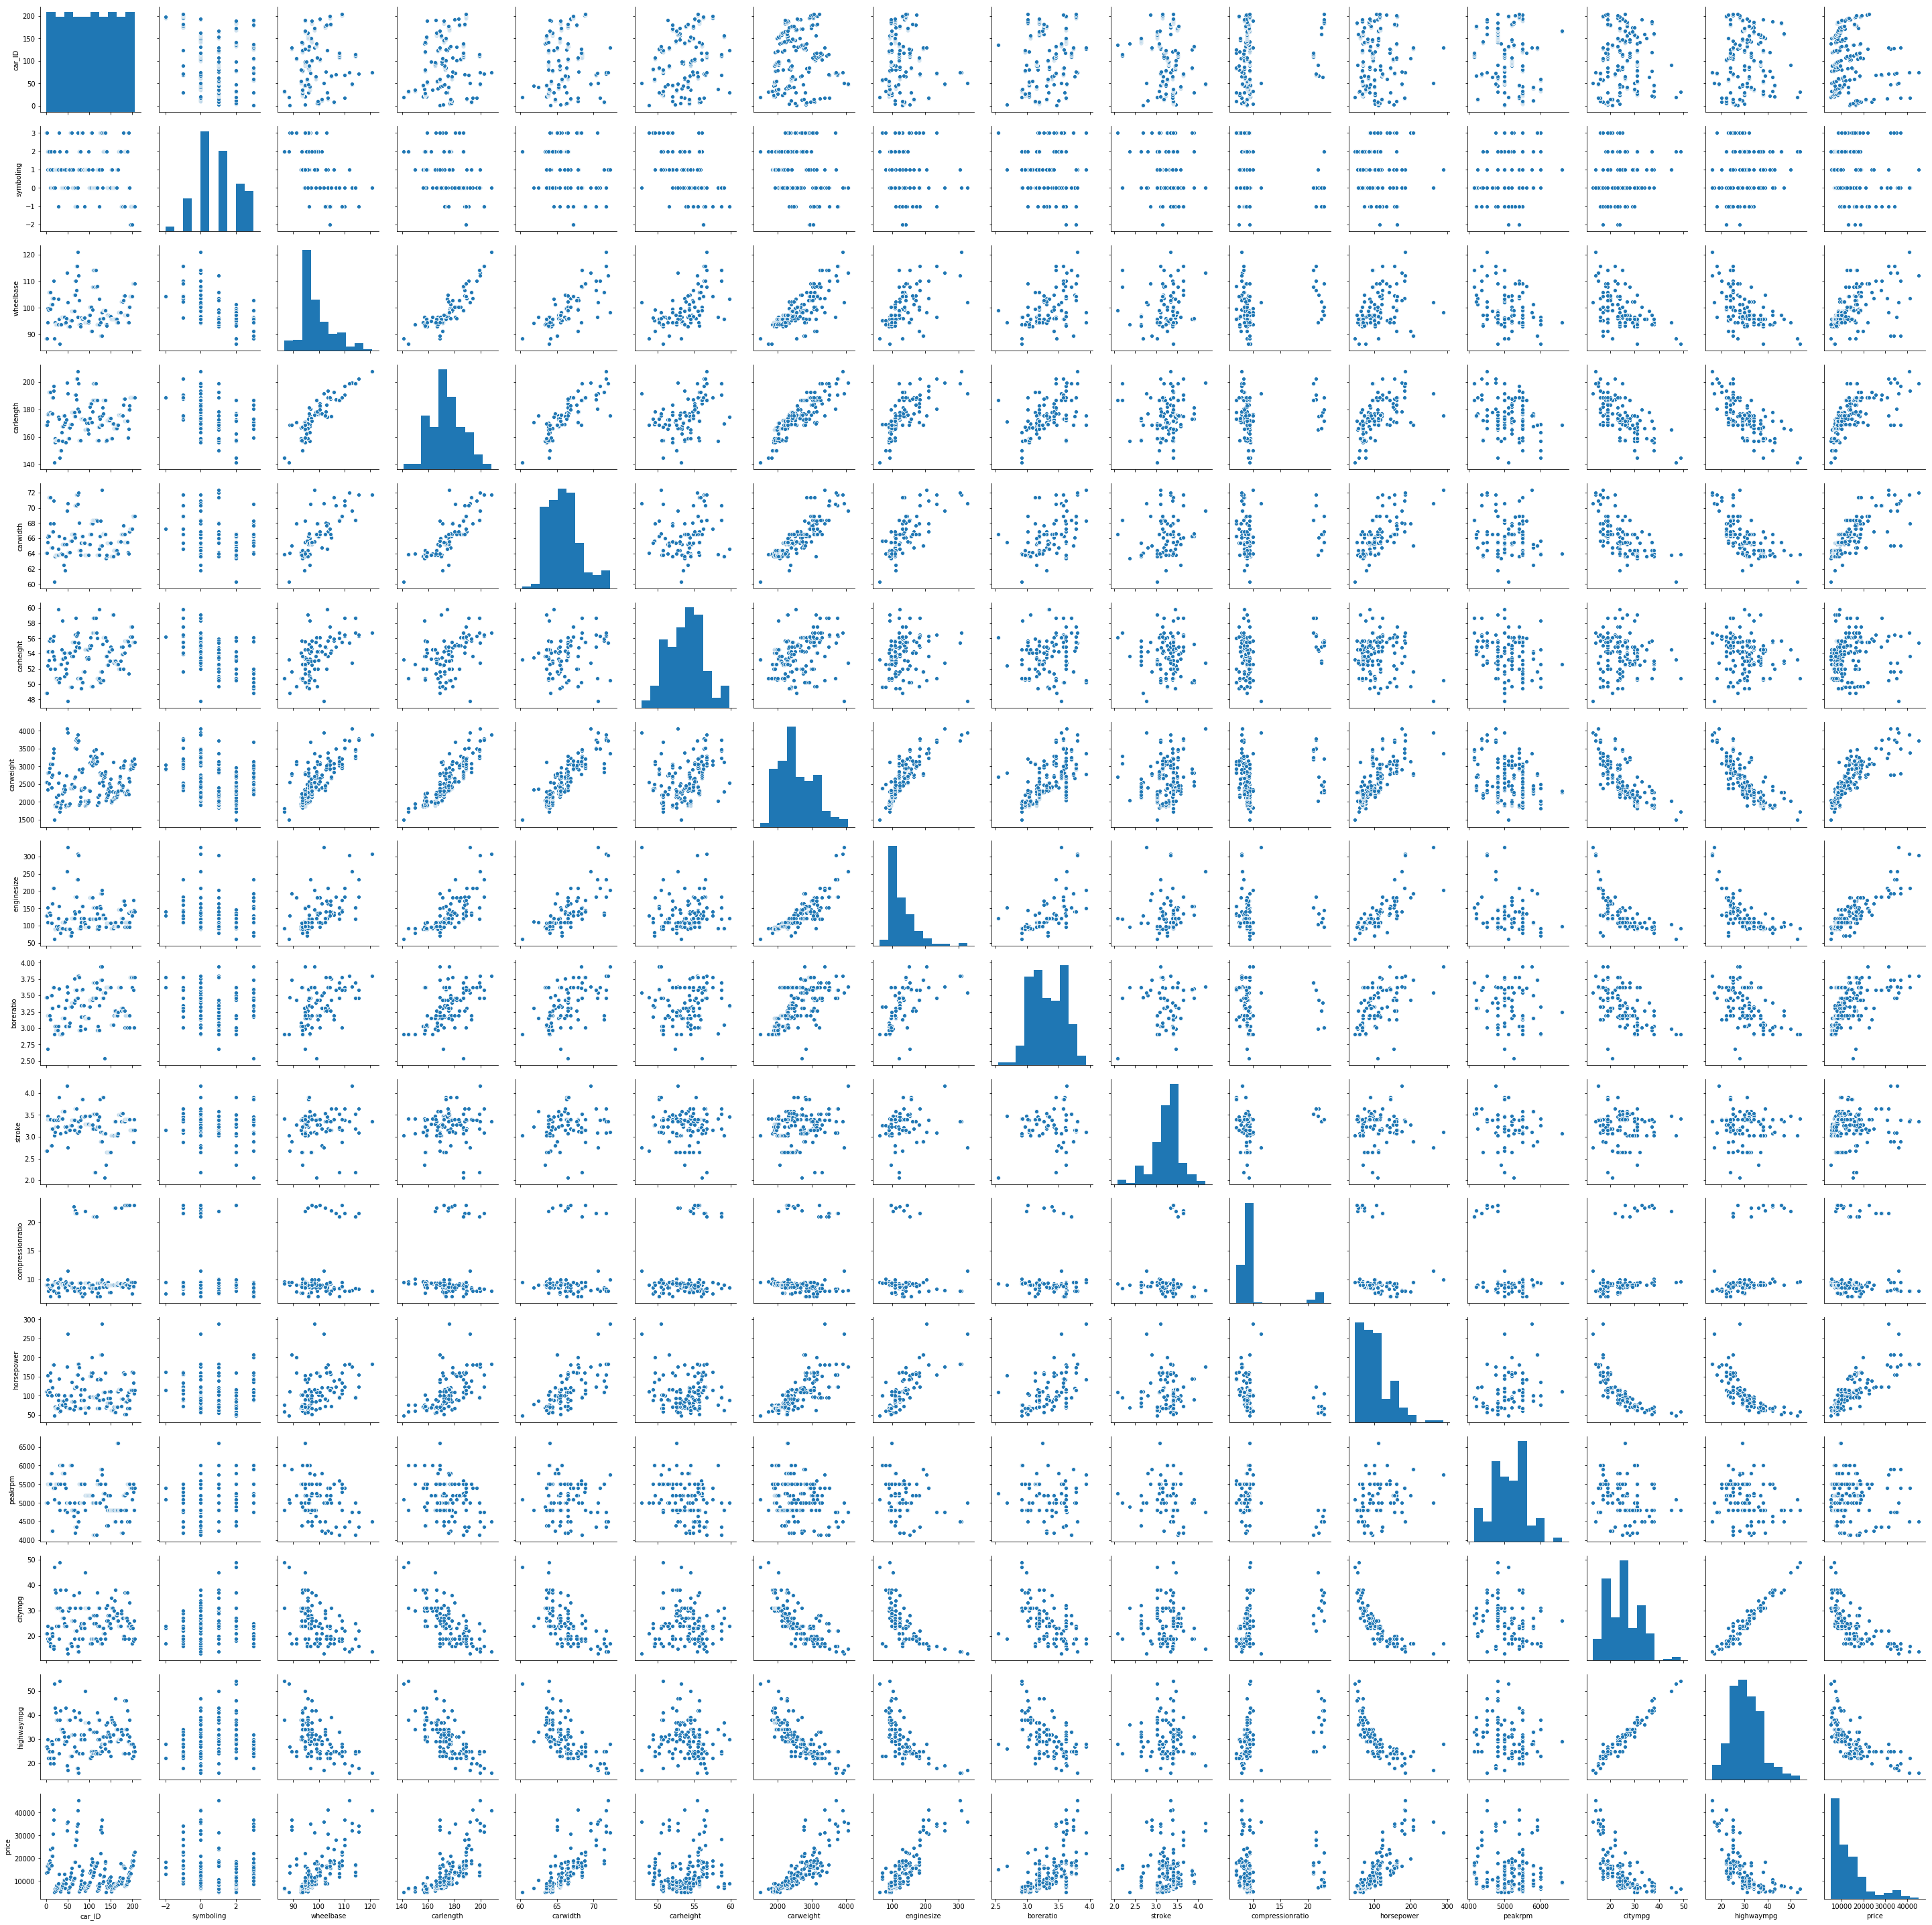

In [242]:
# Visualizing numeric values
sns.pairplot(df_carDetails)
plt.show()

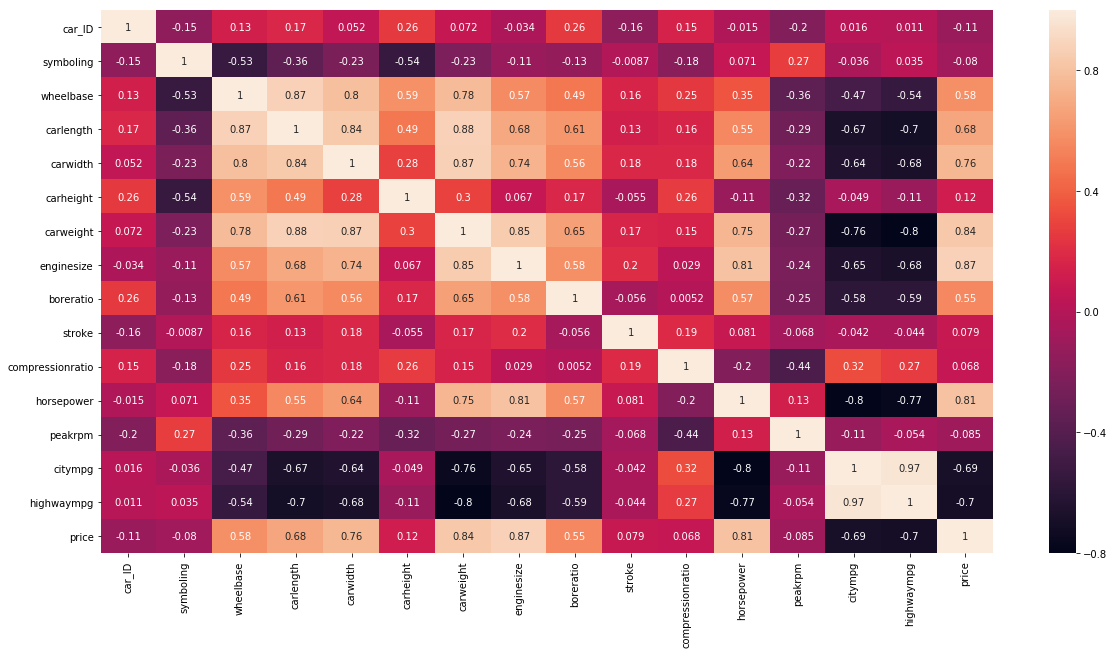

In [243]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_carDetails.corr(),annot = True)
plt.show()

From the scatter plot and heatmap of correlation it is clear that citympg and highwaympg are highly correlated with .97. So we can drop one coulmn, lets drop highwaympg. Similary carlenght is highly correlated to carwight,wheelbase and carweight with .88,.87 and .84 correlation.So we can keep anyone column and drop others. Lets keep carlength and drop others.

In [244]:
df_carDetails.drop(['carwidth','carweight','wheelbase','highwaympg'], axis =1, inplace = True)
df_carDetails.drop(['car_ID'], axis =1, inplace = True)

In [245]:
df_carDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(5), object(10)
memory usage:

In [246]:
#function to plot category variable in three columns
import math
def plot_category_variables(var_list, data, ycolumn):
    totalvar = len(var_list)
    rows = math.ceil(totalvar/3)    
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(rows,3,var_list.index(var)+1)
        sns.boxplot(x = var, y = ycolumn, data = data)
    plt.show()

In [247]:
# Data cleaning
# check all categorical columns and do tranformations if necessay
categorical_variables = list(df_carDetails.columns[df_carDetails.dtypes == 'object'])
print(categorical_variables)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


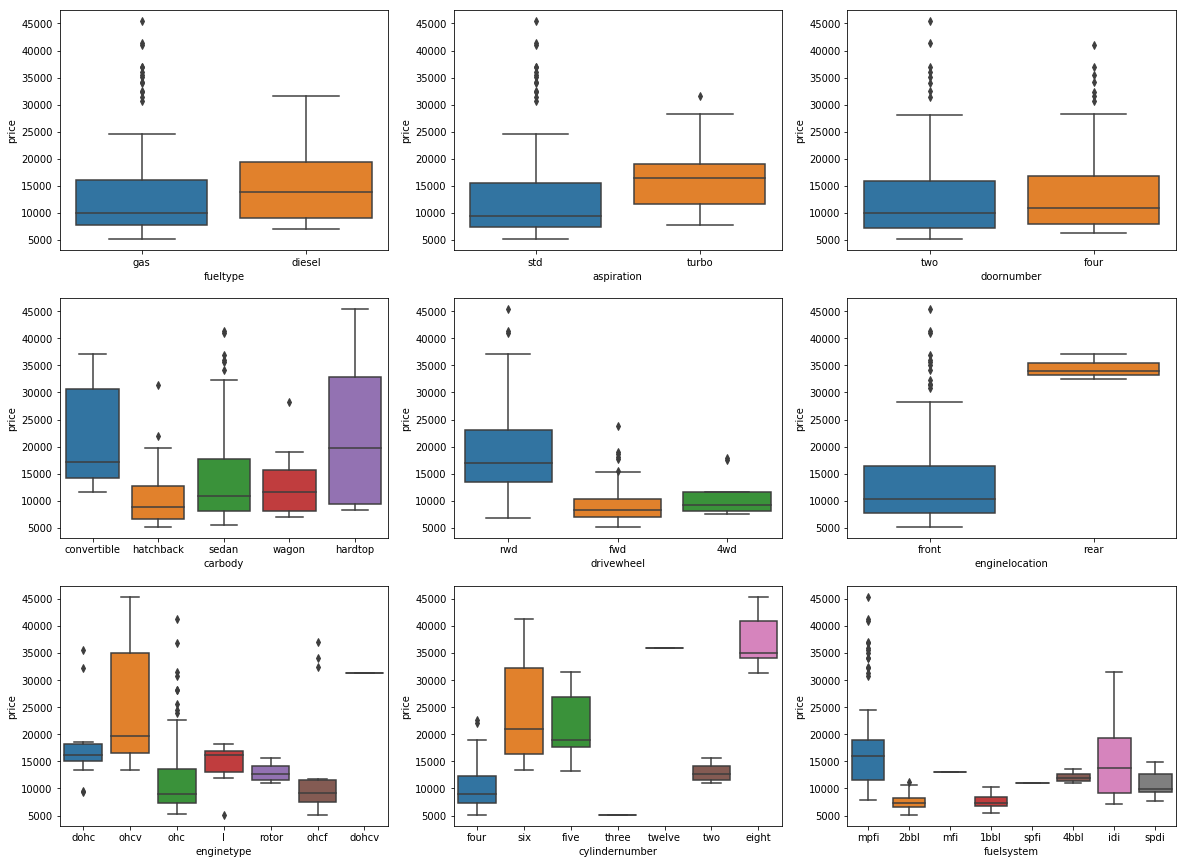

In [248]:
#plot categorical variables against price, excluding car name
plot_category_variables(categorical_variables[1:],df_carDetails,'price')

Observations:
1) second row and third row in the plot shows visible affect on pricing
2) carbody convertible and hardtop carbody prices are higher than other categories
3) rear wheel drive (rwd) can be seen has significant impact on prices.
4) price of car with Engine location rear is significantly higher than fron engine location
5) similarly enginetype, cylindernumber and fuelsystem variance in prices with different category types.

Lets see some of the multiple categorical values against price

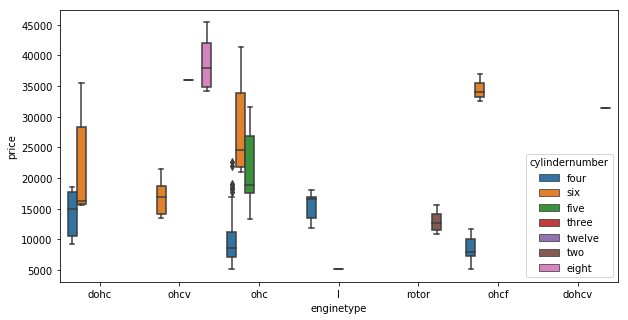

In [249]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=df_carDetails)
plt.show()

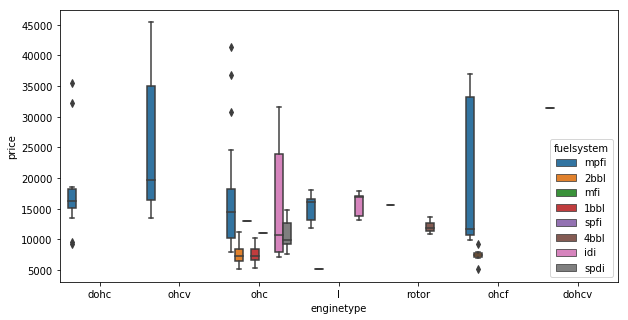

In [250]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fuelsystem', data=df_carDetails)
plt.show()

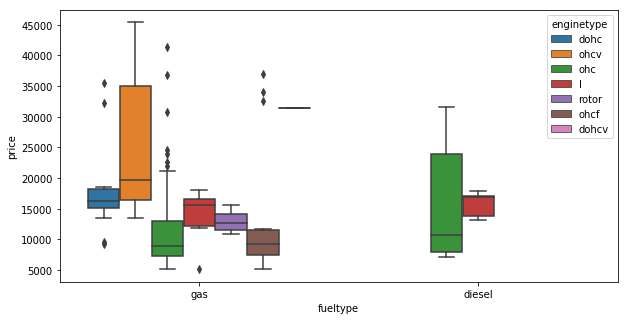

In [251]:
plt.figure(figsize=(10,5))
sns.boxplot(x='fueltype', y='price', hue = 'enginetype', data=df_carDetails)
plt.show()

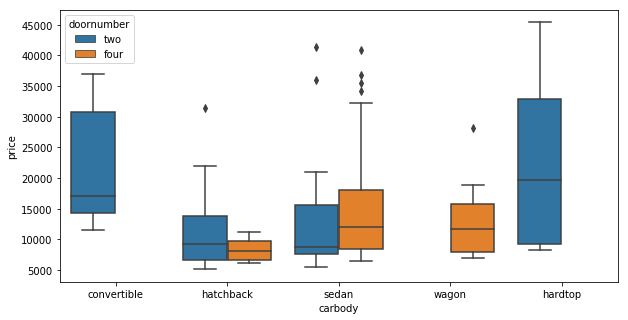

In [252]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'doornumber', data=df_carDetails)
plt.show()

Treating outliers

In [253]:
def plot_dist(dataframe,var_list):
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1) 
        sns.distplot(dataframe[var])
        #sns.distplot(dataframe[col], norm_hist= False)
    plt.show()

['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']


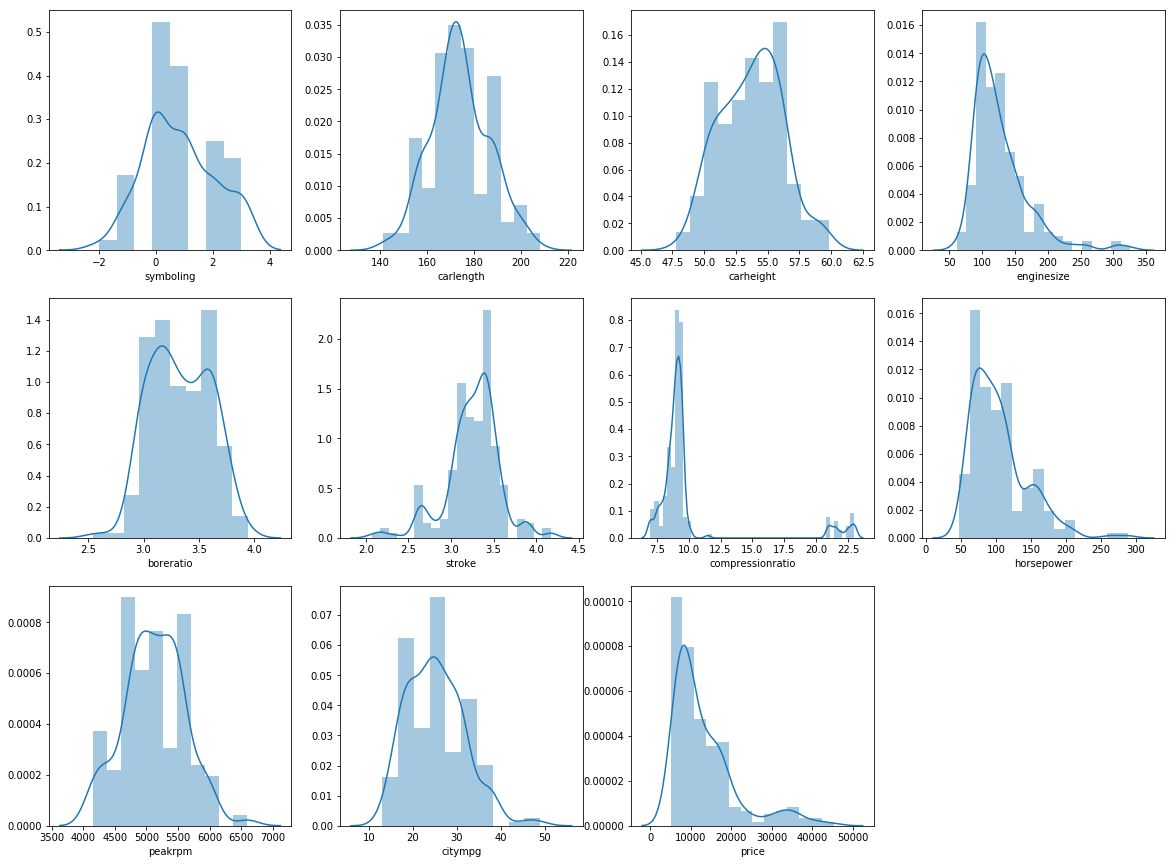

In [254]:
num_variables = list(df_carDetails.columns[df_carDetails.dtypes !='object'])
print(num_variables)
plot_dist(df_carDetails,num_variables)

From the distribution plot it is visible that enginesize,compressionratio, horsepower and price are slightly right skewed. This is due outliers. We can treat outliers by considering considering proper percentile values.

In [256]:
#lets check the values withing below ranges
print(df_carDetails[['horsepower','enginesize']].quantile([0.01, .95]))
print(df_carDetails[['compressionratio']].quantile([0.01, .90]))
# 'horsepower','enginesize' gives a promising with 95 percentile 
# compressionratio gives promising data with 90 percentile
#let clip data for these variables to 95 and 90 percentile

      horsepower  enginesize
0.01       52.12        70.0
0.95      180.80       201.2
      compressionratio
0.01              7.00
0.90             10.94


In [257]:
#treating outliers
df_carDetails['horsepower'][np.abs(df_carDetails['horsepower'] > 180.00)]= 180.00
df_carDetails['enginesize'][np.abs(df_carDetails['enginesize'] > 201.00)]= 201.00
df_carDetails['compressionratio'][np.abs(df_carDetails['compressionratio'] > 10.94)]= 10.94

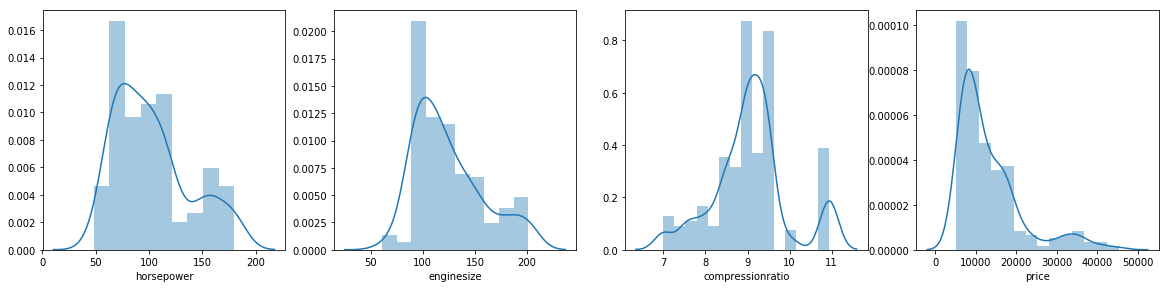

In [258]:
plot_dist(df_carDetails,['horsepower','enginesize','compressionratio','price'])

In [ ]:
Data Preparation

In [259]:
df_carDetails.columns.values

array(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carlength',
       'carheight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price'], dtype=object)

In [260]:
df_carDetails.CarName.unique()
#car name has two parts  - the first word is the name of 'car company' and the second is the 'car model'. we 
# need to consider only company name as the independent variable for model building. So spliting the column into two
# and creating a new column car_company

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [261]:
#replacing mispelled company names with proper name and to lowecase
def transform(val):
    toreturn = val.lower()
    if toreturn == "toyouta":
        toreturn='toyota'
    elif toreturn =="porcshce":
        toreturn='porsche'
    elif toreturn =='maxda':
        toreturn ='mazda'
    elif toreturn =='vokswagen' or toreturn =='vw':
        toreturn ='volkswagen'
    return toreturn
#car_price.CarName.unique()
df_carDetails['carcompany'] = df_carDetails.CarName.str.split(' ', n = 2, expand = True)[0].apply(transform,1)
df_carDetails['carcompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [262]:
#droping carName columsn
df_carDetails.drop(['CarName'], axis =1, inplace = True)
df_carDetails.columns.values

array(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carlength', 'carheight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'price', 'carcompany'], dtype=object)

In [263]:
df_carDetails.fueltype.unique()
#as fuel type is either gas or diesel we can convert this to binary 0 and 1

array(['gas', 'diesel'], dtype=object)

In [264]:
df_carDetails.fueltype = df_carDetails.fueltype.map({'gas':0,'diesel':1})

In [265]:
df_carDetails.aspiration.unique()
#as aspiration  is either std or turbo we can convert this to binary 0 and 1

array(['std', 'turbo'], dtype=object)

In [266]:
df_carDetails.aspiration = df_carDetails.aspiration.map({'std':0,'turbo':1})

In [267]:
df_carDetails.doornumber.unique()

array(['two', 'four'], dtype=object)

In [268]:
df_carDetails.doornumber = df_carDetails.doornumber.map({'two':0,'four':1})

In [269]:
df_carDetails.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [270]:
df_carDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
carcompany          205 non-null object
dtypes: float64(6), int64(8), object(7)
memory usage: 33.

In [271]:
# Creating dummy variables, Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
df_car = pd.get_dummies(df_carDetails, drop_first = True)

In [272]:
df_car.head()

,symboling,fueltype,aspiration,doornumber,carlength,carheight,enginesize,boreratio,stroke,compressionratio,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
0,3,0,0,0,168.8,48.8,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,168.8,48.8,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,171.2,52.4,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,176.6,54.3,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,176.6,54.3,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
df_car.columns.values

array(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carlength',
       'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'carcompany_audi', 'carcompany_bmw', 'carcompany_buick',
       'carcompany_chevrolet', 'carcompany_dodge', 'carcompany_honda',
       'carcompany_isuzu', 'carcompany_jaguar', 'carcompany_mazda',
       'carcompan

In [274]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
carlength                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
price                    205 non-null float64
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8
drivewheel_fwd           205 non-null uint8
drivewheel_rwd           205 non-null uint8
eng

In [275]:
catgorical_var = list(df_car.columns[df_car.dtypes =='object'])
catgorical_var

[]

Splitting the Data into Training and Testing Sets

In [276]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [277]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,carlength,carheight,enginesize,boreratio,stroke,compressionratio,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
122,1,0,0,1,167.3,50.8,98,2.97,3.23,9.4,...,0,0,1,0,0,0,0,0,0,0
125,3,0,0,0,168.9,50.2,151,3.94,3.11,9.5,...,0,0,0,1,0,0,0,0,0,0
166,1,0,0,0,168.7,52.6,98,3.24,3.08,9.4,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,168.8,48.8,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
199,-1,0,1,1,188.8,57.5,130,3.62,3.15,7.5,...,0,0,0,0,0,0,0,0,0,1


Rescaling the Features

In [278]:
from sklearn.preprocessing import MinMaxScaler

In [279]:
scaler = MinMaxScaler()

In [280]:
# Apply scaler() to all the columns except 'dummy' variables
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [281]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,carlength,carheight,enginesize,boreratio,stroke,compressionratio,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
122,0.6,0,0,1,0.426016,0.265487,0.264286,0.230159,0.525253,0.609137,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0,0,0,0.452033,0.212389,0.642857,1.000000,0.464646,0.634518,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0,0,0,0.448780,0.424779,0.264286,0.444444,0.449495,0.609137,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,0.450407,0.088496,0.492857,0.626984,0.247475,0.507614,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0,1,1,0.775610,0.858407,0.492857,0.746032,0.484848,0.126904,...,0,0,0,0,0,0,0,0,0,1


In [282]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,carlength,carheight,enginesize,boreratio,stroke,compressionratio,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.090909,0.181818,0.559441,0.525476,0.509004,0.440709,0.497946,0.535389,0.522843,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.288490,0.387050,0.498199,0.204848,0.215378,0.242829,0.207140,0.157843,0.220555,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.399187,0.353982,0.257143,0.305556,0.464646,0.406091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.502439,0.522124,0.350000,0.500000,0.545455,0.507614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.000000,0.000000,1.000000,0.669919,0.668142,0.571429,0.682540,0.611111,0.609137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X and Y sets for the model building

In [283]:
y_train = df_train.pop('price')
X_train = df_train

Using RFE - Recursive Feature  to eliminate features

In [287]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [288]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
#running RFE and selecting 15 features best describing the price of cars
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [289]:
#list out rfe support and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 23),
 ('fueltype', False, 10),
 ('aspiration', False, 8),
 ('doornumber', False, 37),
 ('carlength', True, 1),
 ('carheight', False, 19),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', False, 32),
 ('peakrpm', False, 7),
 ('citympg', False, 12),
 ('carbody_hardtop', False, 16),
 ('carbody_hatchback', False, 15),
 ('carbody_sedan', False, 14),
 ('carbody_wagon', False, 13),
 ('drivewheel_fwd', False, 43),
 ('drivewheel_rwd', False, 34),
 ('enginelocation_rear', False, 38),
 ('enginetype_dohcv', False, 30),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 18),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 45),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 31),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 3),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 2),
 ('cylindernumber_two', True, 1),
 ('fuelsystem_2bbl

In [293]:
# 15 best columns with rfe support
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'enginetype_rotor',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_two',
       'carcompany_audi', 'carcompany_bmw', 'carcompany_buick',
       'carcompany_jaguar', 'carcompany_porsche', 'carcompany_saab',
       'carcompany_volvo'],
      dtype='object')

In [294]:
# columns without rfe support
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carheight',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_six', 'cylindernumber_twelve',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'carcompany_chevrolet', 'carcompany_dodge',
       'carcompany_honda', 'carcompany_isuzu', 'carcompany_mazda',
       'carcompany_mercury', 'carcompany_mitsubishi', 'carcompany_nissan',
       'carcompany_peugeot', 'carcompany_plymouth', 'carcompany_renault',
       'carcompany_subaru', 'carcompany_toyota', 'carcompany_volkswagen'],
      dtype='object')

In [317]:
#either we can drop the columns wihtout rfe support or create a new dataframe containing only rfe supported columns
# I am going with approach two, creating separate dataframe with only rfe supported variables
X_train_rfe = X_train[rfe_col]

In [318]:
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

Building model using statsmodel

In [330]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     107.9
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.13e-63
Time:                        11:05:39   Log-Likelihood:                 199.22
No. Observations:                 143   AIC:                            -368.4
Df Residuals:                     128   BIC:                            -324.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1521 

p values are withing range of .05. This may be because i already dropped few correlated columns initially. Lets VIF now.

In [320]:
def Cal_VIF(X_train):    
    vif = pd.DataFrame()    
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [331]:
Cal_VIF(X_train_rfe)

,Features,VIF
5,enginetype_rotor,inf
8,cylindernumber_two,inf
0,const,69.680000
2,enginesize,20.450000
6,cylindernumber_four,12.780000
3,boreratio,6.550000
1,carlength,3.730000
4,stroke,2.050000
9,carcompany_audi,1.920000
7,cylindernumber_three,1.840000


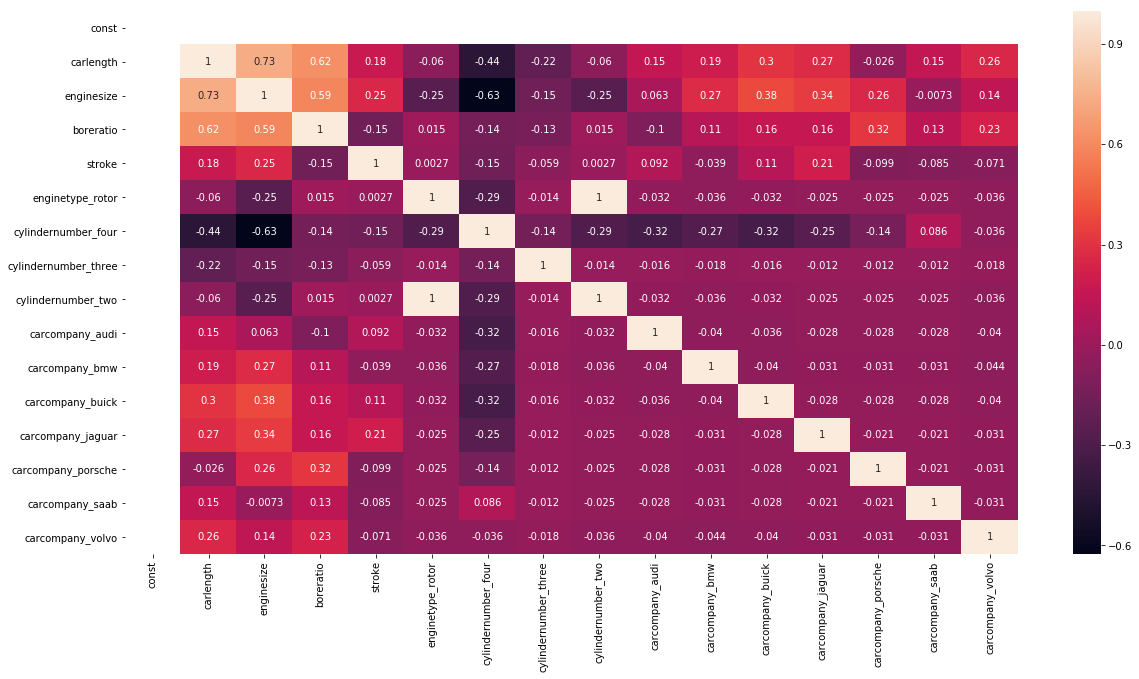

In [332]:
#plot correlation matrix
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_1.corr(),annot = True)

Observations:
It is clear from the matrix that cylindernumber_two and enginetype_rotor are highly correlated. Also vif value is infinite for these.So one column can be dropped. Lets drop column enginetype_rotor and rebuild a new model.

In [333]:
#dropping enginetype_rotor
X_train_rfe_2 = X_train_rfe.drop('enginetype_rotor', axis=1)

In [342]:
#build a second fitted model
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)
lm_2 = sm.OLS(y_train,X_train_rfe_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     107.9
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.13e-63
Time:                        11:28:21   Log-Likelihood:                 199.22
No. Observations:                 143   AIC:                            -368.4
Df Residuals:                     128   BIC:                            -324.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1521 

In [343]:
#calculate VIF
Cal_VIF(X_train_rfe_2)

,Features,VIF
0,const,69.68
2,enginesize,20.45
5,cylindernumber_four,12.78
3,boreratio,6.55
7,cylindernumber_two,5.73
1,carlength,3.73
4,stroke,2.05
8,carcompany_audi,1.92
6,cylindernumber_three,1.84
12,carcompany_porsche,1.50


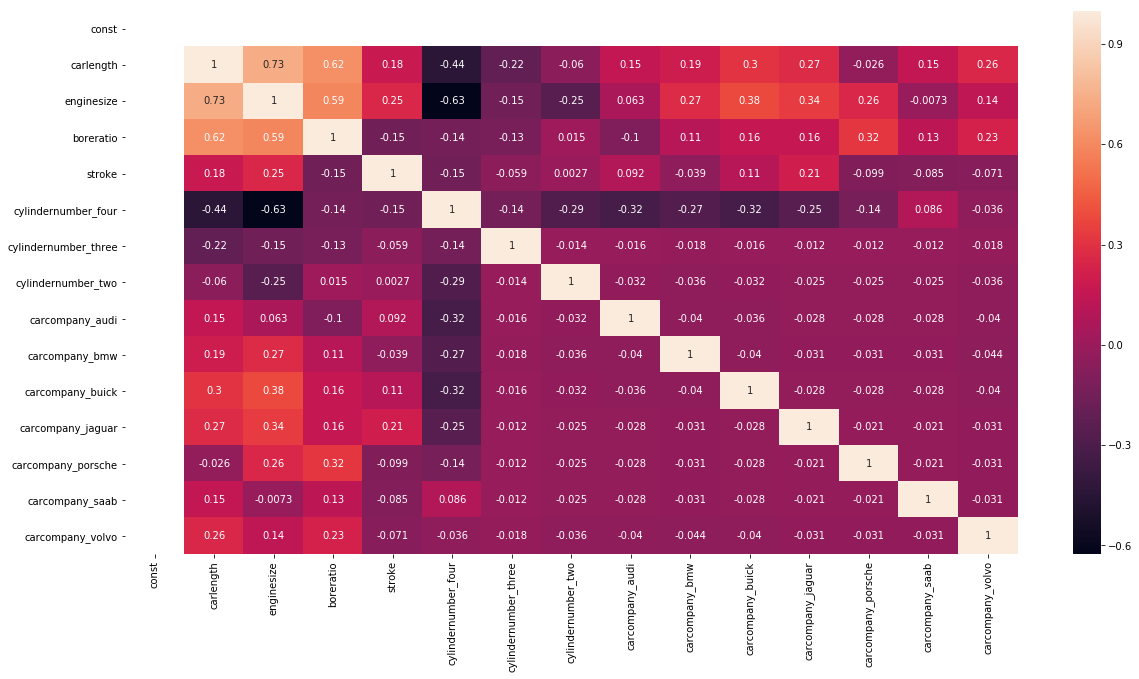

In [337]:
#plot correlation matrix
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_2.corr(),annot = True)

observation:
As we can see enginesize has high VIF of 20.45 , also it is highly correlated to car length .73. We can drop engine size.

In [344]:
#dropping enginesize
X_train_rfe_3 = X_train_rfe_2.drop('enginesize', axis=1)

In [345]:
#build a third fitted model
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lm_3 = sm.OLS(y_train,X_train_rfe_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     77.31
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           2.72e-54
Time:                        11:28:42   Log-Likelihood:                 172.37
No. Observations:                 143   AIC:                            -316.7
Df Residuals:                     129   BIC:                            -275.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0640 

In [346]:
#calculate VIF
Cal_VIF(X_train_rfe_3)

,Features,VIF
0,const,41.29
1,carlength,3.56
4,cylindernumber_four,2.86
2,boreratio,2.73
11,carcompany_porsche,1.49
9,carcompany_buick,1.44
6,cylindernumber_two,1.39
7,carcompany_audi,1.36
8,carcompany_bmw,1.33
10,carcompany_jaguar,1.33


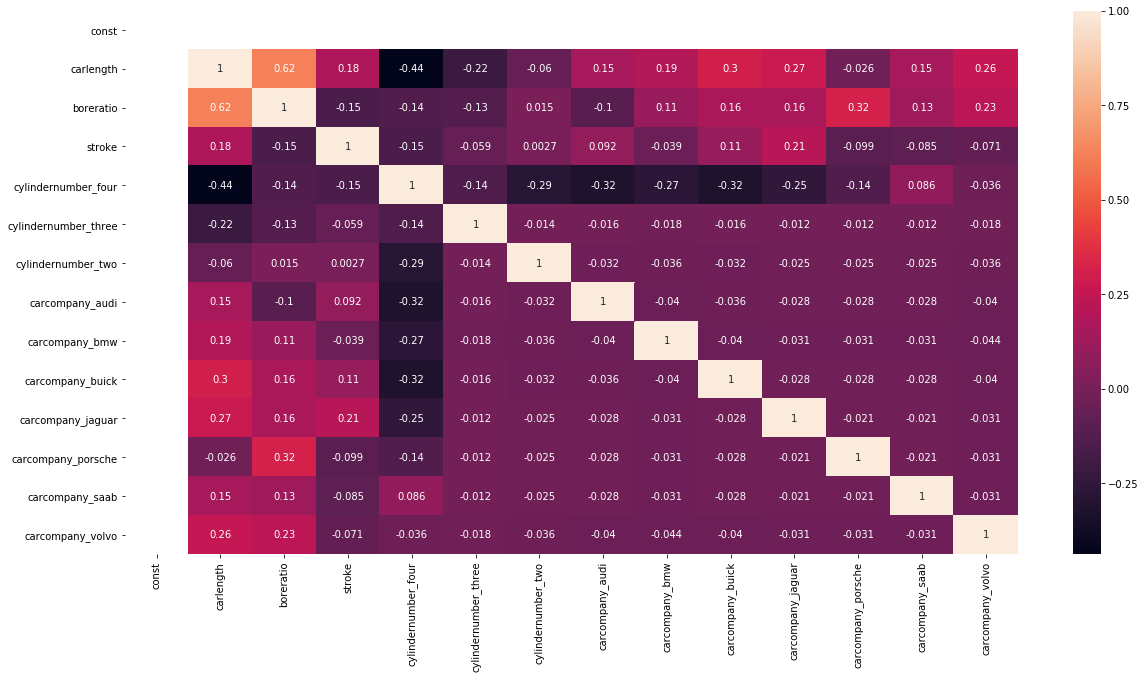

In [347]:
#plot correlation matrix
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_3.corr(),annot = True)

In [348]:
#droping stroke with higher p value of .313
X_train_rfe_4 = X_train_rfe_3.drop('stroke', axis=1)

In [349]:
#build a third fitted model
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
lm_4 = sm.OLS(y_train,X_train_rfe_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     83.66
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           4.81e-55
Time:                        11:33:46   Log-Likelihood:                 171.81
No. Observations:                 143   AIC:                            -317.6
Df Residuals:                     130   BIC:                            -279.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0868 

In [350]:
Cal_VIF(X_train_rfe_4)

,Features,VIF
0,const,28.90
1,carlength,3.27
3,cylindernumber_four,2.85
2,boreratio,2.45
10,carcompany_porsche,1.48
8,carcompany_buick,1.44
5,cylindernumber_two,1.39
6,carcompany_audi,1.36
7,carcompany_bmw,1.32
9,carcompany_jaguar,1.30


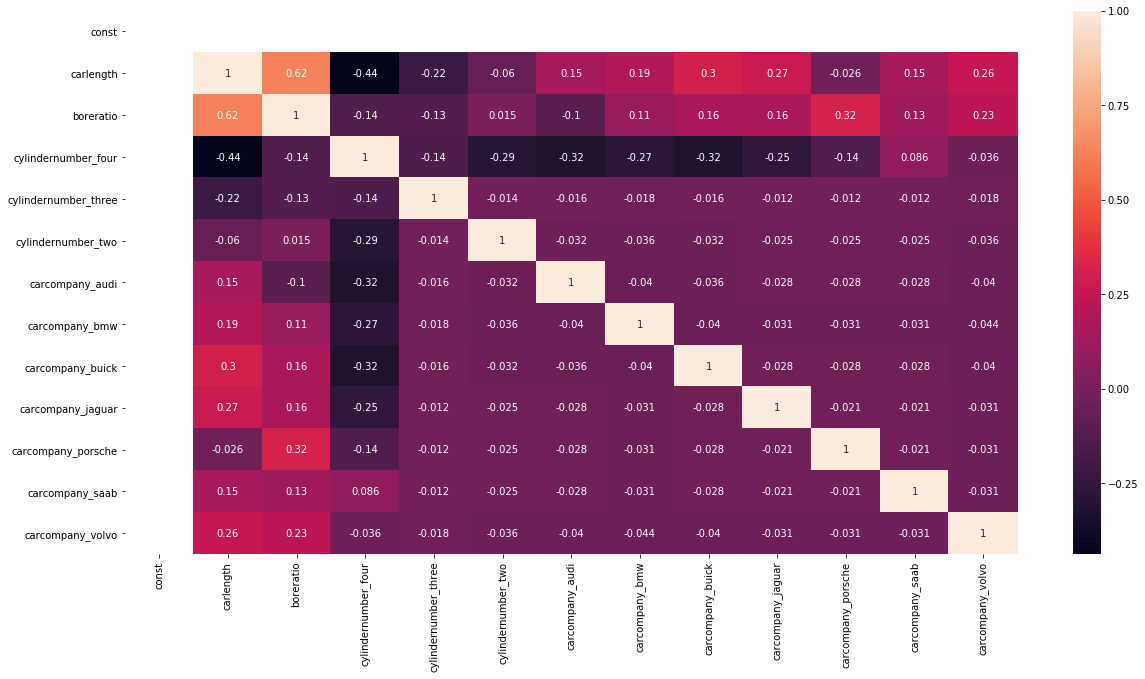

In [351]:
#plot correlation matrix
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_4.corr(),annot = True)

In [352]:
#droping cylindernumber_two which has high p value ,277
X_train_rfe_5 = X_train_rfe_4.drop('cylindernumber_two', axis=1)

In [353]:
#build a 5th fitted model
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)
lm_5 = sm.OLS(y_train,X_train_rfe_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     91.02
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           8.84e-56
Time:                        11:50:14   Log-Likelihood:                 171.16
No. Observations:                 143   AIC:                            -318.3
Df Residuals:                     131   BIC:                            -282.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0706 

In [354]:
Cal_VIF(X_train_rfe_5)

,Features,VIF
0,const,23.49
1,carlength,3.02
2,boreratio,2.31
3,cylindernumber_four,2.08
9,carcompany_porsche,1.38
7,carcompany_buick,1.36
5,carcompany_audi,1.30
6,carcompany_bmw,1.25
8,carcompany_jaguar,1.25
4,cylindernumber_three,1.17


In [355]:
#dropping cylindernumber_three with high pvalue and vif value of 1.17
X_train_rfe_6 = X_train_rfe_5.drop('cylindernumber_three', axis=1)

In [356]:
#build 6th fitted model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)
lm_6 = sm.OLS(y_train,X_train_rfe_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     99.99
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.44e-56
Time:                        11:53:20   Log-Likelihood:                 170.59
No. Observations:                 143   AIC:                            -319.2
Df Residuals:                     132   BIC:                            -286.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0589    

In [357]:
Cal_VIF(X_train_rfe_6)

,Features,VIF
0,const,20.26
1,carlength,2.77
2,boreratio,2.29
3,cylindernumber_four,1.90
8,carcompany_porsche,1.37
6,carcompany_buick,1.36
4,carcompany_audi,1.30
7,carcompany_jaguar,1.25
5,carcompany_bmw,1.24
10,carcompany_volvo,1.17


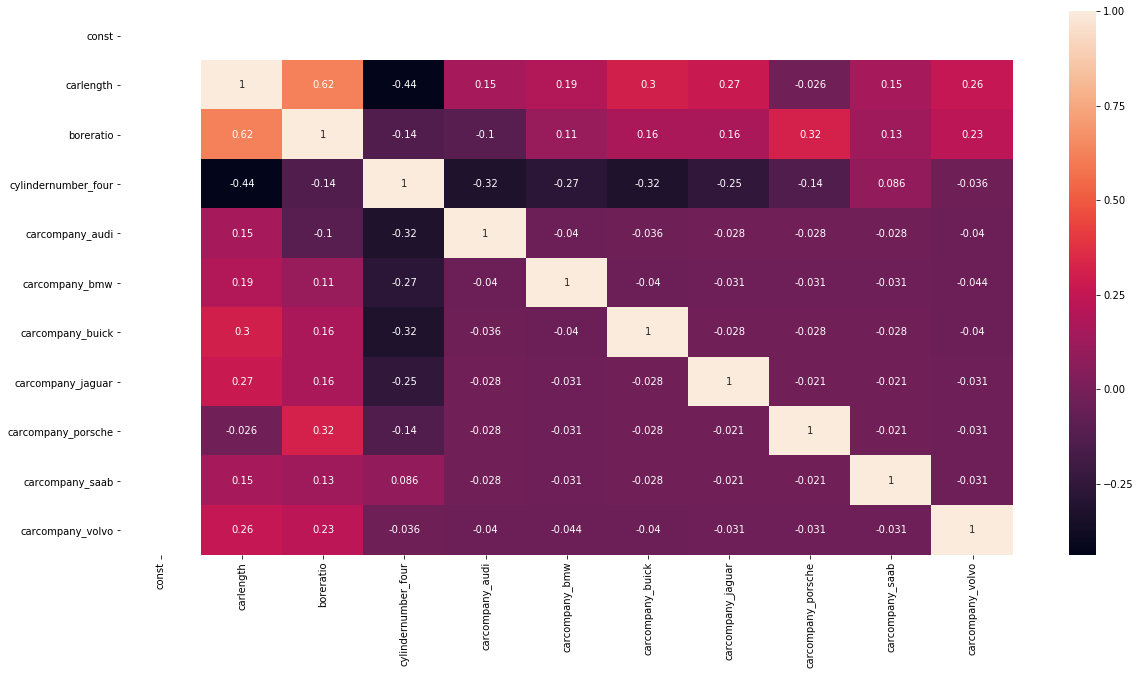

In [359]:
#plot correlation matrix
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_6.corr(),annot = True)

In [360]:
#dropping carcompany_audi with high pvalue of .175
X_train_rfe_7 = X_train_rfe_6.drop('carcompany_audi', axis=1)

In [361]:
#build a 7th fitted model
X_train_rfe_7 = sm.add_constant(X_train_rfe_7)
lm_7 = sm.OLS(y_train,X_train_rfe_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           3.32e-57
Time:                        11:57:59   Log-Likelihood:                 169.59
No. Observations:                 143   AIC:                            -319.2
Df Residuals:                     133   BIC:                            -289.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0663    

In [362]:
Cal_VIF(X_train_rfe_7)

,Features,VIF
0,const,19.53
1,carlength,2.64
2,boreratio,2.23
3,cylindernumber_four,1.69
7,carcompany_porsche,1.37
5,carcompany_buick,1.28
6,carcompany_jaguar,1.20
4,carcompany_bmw,1.19
9,carcompany_volvo,1.16
8,carcompany_saab,1.08


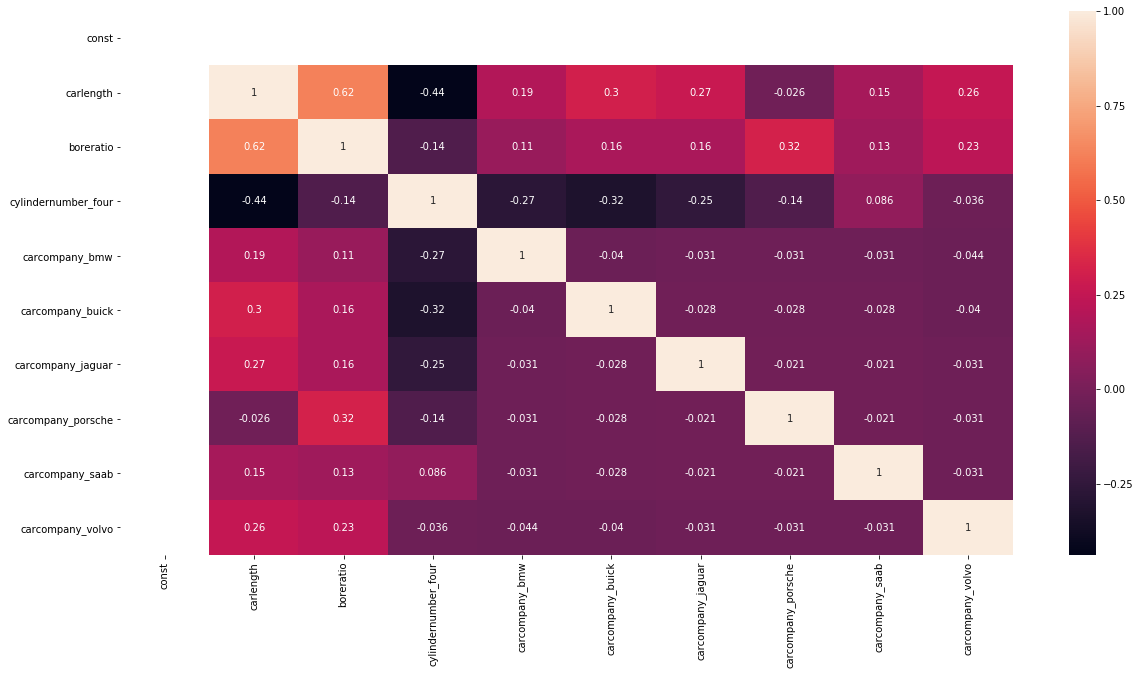

In [363]:
#plot correlation matrix
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_7.corr(),annot = True)

In [365]:
#dropping company saab with high pvalue .211
X_train_rfe_8 = X_train_rfe_7.drop('carcompany_saab', axis=1)

In [366]:
#build a 8th fitted model
X_train_rfe_8 = sm.add_constant(X_train_rfe_8)
lm_8 = sm.OLS(y_train,X_train_rfe_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     123.2
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           6.30e-58
Time:                        12:01:44   Log-Likelihood:                 168.75
No. Observations:                 143   AIC:                            -319.5
Df Residuals:                     134   BIC:                            -292.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0592    

In [367]:
Cal_VIF(X_train_rfe_8)

,Features,VIF
0,const,18.75
1,carlength,2.55
2,boreratio,2.23
3,cylindernumber_four,1.67
7,carcompany_porsche,1.37
5,carcompany_buick,1.28
6,carcompany_jaguar,1.20
4,carcompany_bmw,1.18
8,carcompany_volvo,1.14


In [368]:
#dropping column boreration with high pvalue of .150 and high vif of 2.23
X_train_rfe_9 = X_train_rfe_8.drop('boreratio', axis=1)

In [369]:
#build a third fitted model
X_train_rfe_9 = sm.add_constant(X_train_rfe_9)
lm_9 = sm.OLS(y_train,X_train_rfe_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.44e-58
Time:                        12:03:50   Log-Likelihood:                 167.64
No. Observations:                 143   AIC:                            -319.3
Df Residuals:                     135   BIC:                            -295.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0607    

In [370]:
Cal_VIF(X_train_rfe_9)

,Features,VIF
0,const,18.72
1,carlength,1.54
2,cylindernumber_four,1.51
4,carcompany_buick,1.27
5,carcompany_jaguar,1.19
3,carcompany_bmw,1.17
7,carcompany_volvo,1.13
6,carcompany_porsche,1.04


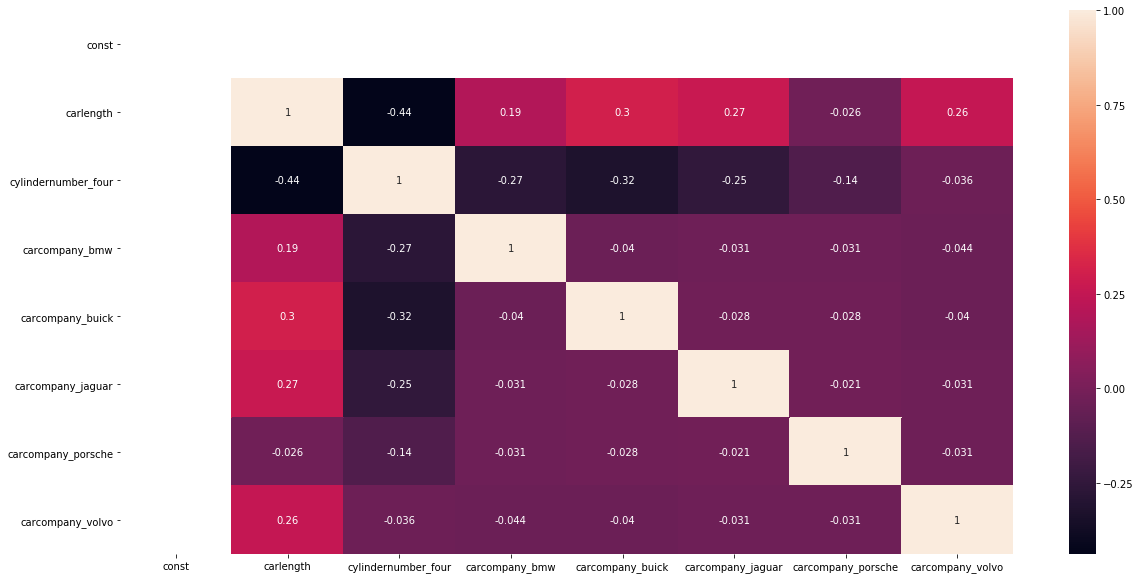

In [371]:
#plot correlation matrix
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_9.corr(),annot = True)

Observation:
Now all the variables have very low p value and VIF and R-squared and Adj R-Squared are almost equal with .87 which is quite a significat fit.We will conclude with these variables as the final model predictor variables.

Let us now predict with the test data and do anlysis on error

In [372]:
#lets now predict with model 9 lm_9
y_train_price = lm_9.predict(X_train_rfe_9)

Text(0.5, 0, 'Errors')

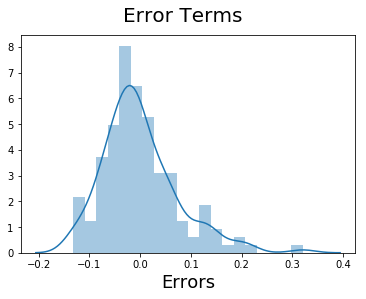

In [373]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Observation:
There is some variance along right tail but may not be a perfect normal distribution and centered not perfectly but almost around zero. considering the size of the train and test data this error term distribution still is almost close to a normal distribution.

In [374]:
#lets predict using the model
#dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [375]:
# Now let's use our model to make predictions.

#droping const column
X_train_rfe_9= X_train_rfe_9.drop(['const'], axis=1)
#taking only the columns in the model
X_test_pred = X_test[X_train_rfe_9.columns]

# Adding a constant variable 
X_test_pred = sm.add_constant(X_test_pred)

In [376]:
# Making predictions
y_pred = lm_9.predict(X_test_pred)

Text(0, 0.5, 'y_pred')

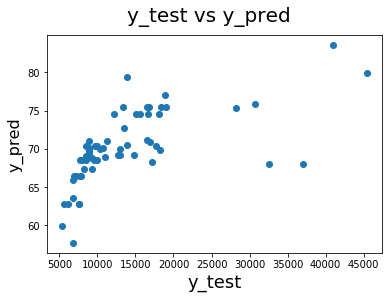

In [377]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

Observation:
y_test VS y_pred is not observed to be linear as there are variataion occuring. There is still scope of improvement.

In [ ]:
Conclusion
The R square and Adjusted R square value in CarModelWithOutliers is almost same which is 87.8% and 87.2% respectively which indicates that none of the parameters in CarModelWithOutliers model are reduntant.

And also from Error Terms scatter plot we can see that the error (y_test-y-pred) is unequally distributed, and does not follow any pattern, as there is no curve, and shows no relation which indicates that it is just the white noise.


As we can see that the model seems to be stable, The variables that can affect price are:
1 carlength
2.cylindernumber_four
3 CarCompany_buick
4.carcompany_jaguar
5 CarCompany_bmw 
6 CarCompany_volvo
7 CarCompany_porche